# 1)
Estamos interesados en la proporción de éxito 𝜃 de una distribución Bernoulli. Tenemos una
muestra observada que consiste en el número de éxitos en 30 ensayos independientes y con idéntica distribución de una Bernoulli con parámetro 𝜃; en esta muestra hay precisamente 19 éxitos.

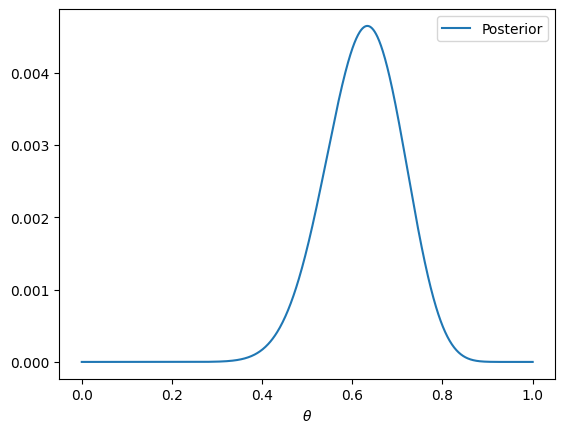

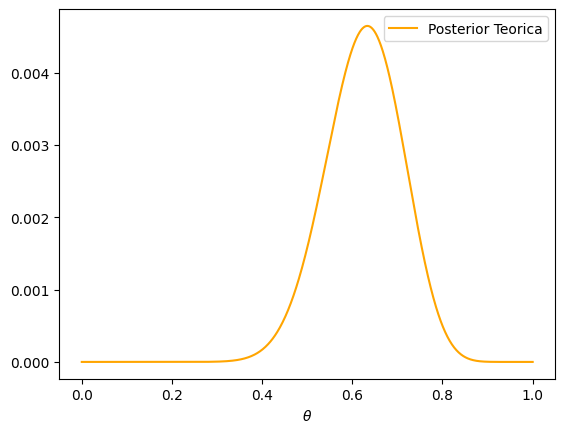

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import comb

p = 0.4
n = 30
exitos = 19

# a) posibles valores de theta (p)
thetas_posibles = np.linspace(0, 1, 1000) # grid


# b) likelihood
likelihoods = stats.binom.pmf(exitos, n, thetas_posibles)

# c)Suponiendo una prior uniforme sobre 𝜃, calcular la distribución posterior no normalizada y luego normalizar
posterior_no_normalizada = likelihoods # prior uniforme
posterior = posterior_no_normalizada / np.sum(posterior_no_normalizada) # normalizo


# d) Graficar la distribución posterior obtenida y comparar con la distribución posterior teórica, que es una Beta.
posterior_teorica = stats.beta.pdf(thetas_posibles, exitos + 1, n - exitos + 1)
posterior_teorica = posterior_teorica / np.sum(posterior_teorica)

plt.plot(thetas_posibles, posterior, label='Posterior')
plt.legend()
plt.xlabel('$\\theta$')
plt.show()

plt.plot(thetas_posibles, posterior_teorica, label='Posterior Teorica', color='orange')
plt.legend()
plt.xlabel('$\\theta$')
plt.show()

Son exactamente iguales, eso es bueno creo

(0.0, 1.0)

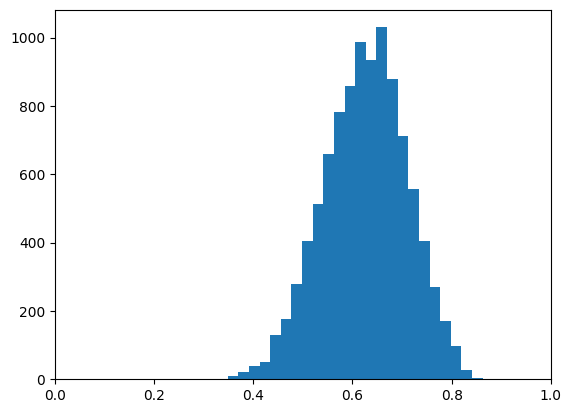

In [23]:
# e) Samplear y dar el 90% HPDI de la posterior y de la posterior predictive.
samples = np.random.choice(thetas_posibles, size=10000, p=posterior) # mapea thetas_posibles con su probabilidad posterior

plt.hist(samples, bins=30)
plt.xlim(0, 1)

In [24]:
hpdi_posterior = np.percentile(samples, 5), np.percentile(samples, 95)
print(f'HPDI Posterior: {hpdi_posterior}')

HPDI Posterior: (0.48348348348348347, 0.7607607607607607)


P(0) = 0.0003
P(1) = 0.0034
P(2) = 0.0117
P(3) = 0.0474
P(4) = 0.0985
P(5) = 0.1631
P(6) = 0.2164
P(7) = 0.2146
P(8) = 0.1521
P(9) = 0.0761
P(10) = 0.0164


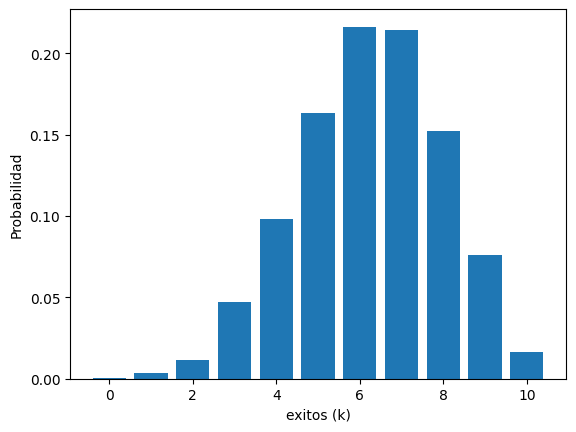

In [25]:
# f) Calcular la probabilidad de ontener k exitos en 10 experimentos
ks = np.arange(0, 11)
probabilidades = np.zeros(len(ks))

# cuento la cantidad de veces que obtengo k exitos en 10 experimentos para cada k
for proba in samples:
    experiementos = np.random.binomial(10, proba, size=1)
    for k in ks:
        probabilidades[k] += np.sum(experiementos == k)

# normalizo para obtener probabilidades
probabilidades = probabilidades / np.sum(probabilidades)

for k, prob in zip(ks, probabilidades):
    print(f"P({k}) = {prob:.4f}")

plt.bar(ks, probabilidades)
plt.xlabel('exitos (k)')
plt.ylabel('Probabilidad')
plt.show()

Asi lo hizo chatgpt, da lo mismo pero no se que onda

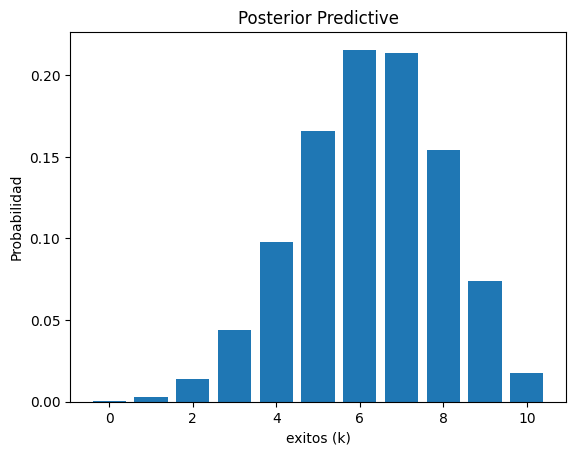

P(0) = 0.0003
P(1) = 0.0030
P(2) = 0.0142
P(3) = 0.0437
P(4) = 0.0978
P(5) = 0.1656
P(6) = 0.2156
P(7) = 0.2136
P(8) = 0.1545
P(9) = 0.0739
P(10) = 0.0179


In [26]:
# f) Calcular la probabilidad de ontener k exitos en 10 experimentos
ks = np.arange(0, 11)

# la posterior predictiva es una betabinomial
posterior_predictive = stats.betabinom.pmf(ks, 10, exitos + 1, n - exitos + 1)

plt.bar(ks, posterior_predictive)
plt.title('Posterior Predictive')
plt.xlabel('exitos (k)')
plt.ylabel('Probabilidad')
plt.show()

for k, prob in zip(ks, posterior_predictive):
    print(f"P({k}) = {prob:.4f}")

Parece una binomial, pero tambien parece una beta asi que no se.

# 2)

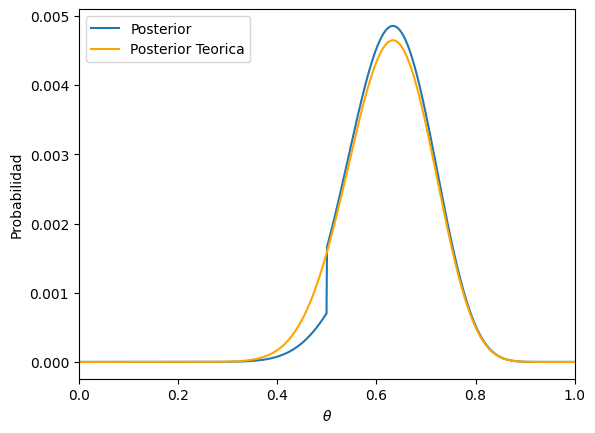

In [6]:
# a) definir una grilla de thetas
thetas_posibles = np.linspace(0, 1, 1000) # grid

# b) likelihood
likelihoods = stats.binom.pmf(exitos, n, thetas_posibles)

# c) suponiendo que el prior viene dado por una uniforme en [0, 0.5] con peso 0.3 
# y otra uniforme en [0.5, 1] con peso 0.7., calcular la distribución posterior no normalizada y luego normalizar

prior = 0.3 * (thetas_posibles <= 0.5) + 0.7 * (thetas_posibles > 0.5)
posterior_no_normalizada = likelihoods * prior
posterior = posterior_no_normalizada / np.sum(posterior_no_normalizada)

# d) Graficar la distribución posterior obtenida y comparar con la distribución posterior teórica, que es una Beta.

posterior_teorica = stats.beta.pdf(thetas_posibles, exitos + 1, n - exitos + 1)
posterior_teorica = posterior_teorica / np.sum(posterior_teorica)

plt.plot(thetas_posibles, posterior, label='Posterior')
plt.plot(thetas_posibles, posterior_teorica, label='Posterior Teorica', color='orange')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('Probabilidad')
plt.xlim(0, 1)
plt.show()


(0.0, 1.0)

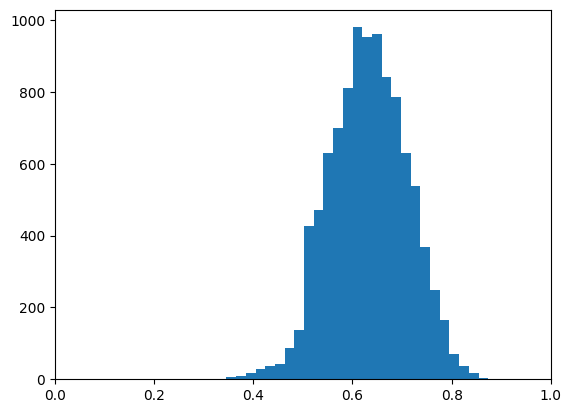

In [7]:
# e) Samplear y dar el 90% HPDI de la posterior y de la posterior predictive.

samples = np.random.choice(thetas_posibles, size=10000, p=posterior)
plt.hist(samples, bins=30)
plt.xlim(0, 1)

In [8]:
hpdi_posterior = np.percentile(samples, 5), np.percentile(samples, 95)
print(f'HPDI Posterior: {hpdi_posterior}')

HPDI Posterior: (0.5095095095095095, 0.7597597597597597)


P(0) = 0.0002
P(1) = 0.0024
P(2) = 0.0119
P(3) = 0.0373
P(4) = 0.0970
P(5) = 0.1582
P(6) = 0.2231
P(7) = 0.2132
P(8) = 0.1611
P(9) = 0.0764
P(10) = 0.0192


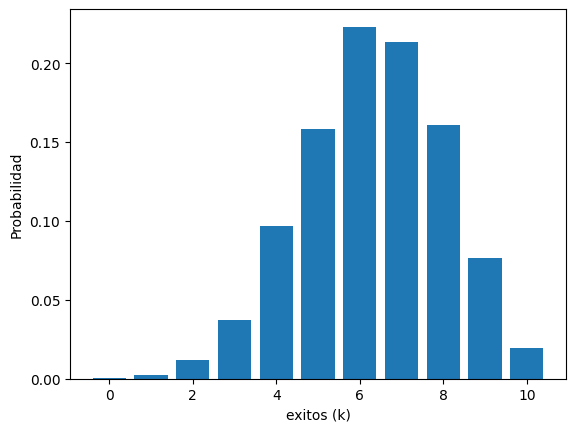

In [9]:
# f) Calcular la probabilidad de ontener k exitos en 10 experimentos
ks = np.arange(0, 11)
probabilidades = np.zeros(len(ks))

# cuento la cantidad de veces que obtengo k exitos en 10 experimentos para cada k
for sample in samples:
    experiementos = np.random.binomial(10, sample, size=1)
    for k in ks:
        probabilidades[k] += np.sum(experiementos == k)

# normalizo para obtener probabilidades
probabilidades = probabilidades / np.sum(probabilidades)

for k, prob in zip(ks, probabilidades):
    print(f"P({k}) = {prob:.4f}")

plt.bar(ks, probabilidades)
plt.xlabel('exitos (k)')
plt.ylabel('Probabilidad')
plt.show()

# 3)
En un estudio de 100 familias con dos hijos cada una, se registraron los géneros de los primeros
y segundos nacidos. El total de niños nacidos es 111 y el total de niñas, 89. Asumamos una prior
uniforme para la probabilidad de que un nacimiento sea un niño.


## a)
Siguiendo el primer ejercicio, computar la distribución posterior para la probabilidad de que
un nacimiento sea un niño. ¿Cuál es el valor del parámetro que maximiza la probabilidad
posterior?

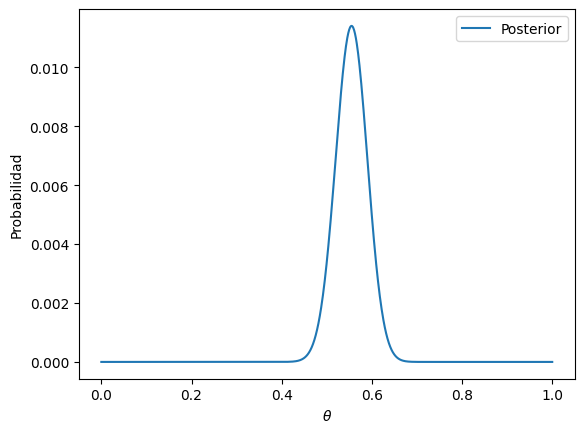

El valor de θ que maximiza la probabilidad posterior es 0.5546


In [16]:
familias = 100
niños = 111
niñas = 89

# theta = probabilidad de nacer niño

# posibles valores de theta (p)
thetas_posibles = np.linspace(0, 1, 1000) # grid

# likelihood
likelihoods = stats.binom.pmf(niños, niños + niñas, thetas_posibles)

# prior
prior = stats.beta.pdf(thetas_posibles, 1, 1) # uniforme

# posterior
posterior_no_normalizada = likelihoods * prior
posterior = posterior_no_normalizada / np.sum(posterior_no_normalizada)

plt.plot(thetas_posibles, posterior, label='Posterior')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('Probabilidad')
plt.show()

theta_max = thetas_posibles[np.argmax(posterior)]
print(f'El valor de θ que maximiza la probabilidad posterior es {theta_max:.4f}')

## b)
Calcular HPDI del 50%, 89% y 97% para el human sex ratio, que es la proporción de nacimientos de niños sobre niñas.

HPDI 50% Posterior: (0.5305305305305306, 0.5775775775775776)
HPDI 89% Posterior: (0.4984984984984985, 0.6106106106106106)
HPDI 97% Posterior: (0.4804804804804805, 0.6316316316316316)


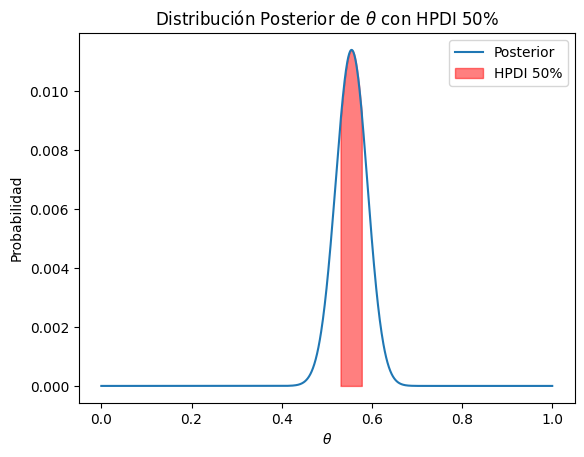

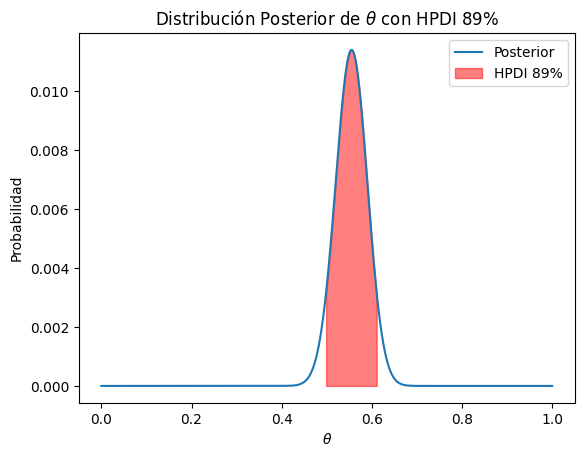

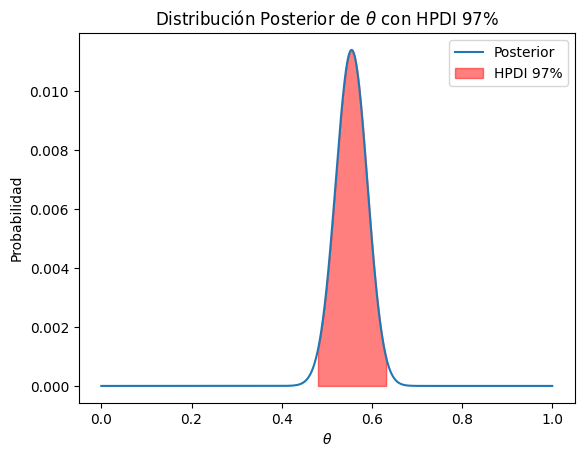

In [17]:
samples = np.random.choice(thetas_posibles, size=10000, p=posterior)

hpdi_50 = np.percentile(samples, 25), np.percentile(samples, 100 - 25)
print(f'HPDI 50% Posterior: {hpdi_50}')

hpdi_89 = np.percentile(samples, 5.5), np.percentile(samples, 100 - 5.5)
print(f'HPDI 89% Posterior: {hpdi_89}')

hpdi_97 = np.percentile(samples, 1.5), np.percentile(samples, 100 - 1.5)
print(f'HPDI 97% Posterior: {hpdi_97}')

plt.plot(thetas_posibles, posterior, label='Posterior')
plt.fill_between(thetas_posibles, 0, posterior, where=(thetas_posibles >= hpdi_50[0]) & (thetas_posibles <= hpdi_50[1]), color='red', alpha = 0.5, label='HPDI 50%')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('Probabilidad')
plt.title('Distribución Posterior de $\\theta$ con HPDI 50%')
plt.show()

plt.plot(thetas_posibles, posterior, label='Posterior')
plt.fill_between(thetas_posibles, 0, posterior, where=(thetas_posibles >= hpdi_89[0]) & (thetas_posibles <= hpdi_89[1]), color='red', alpha = 0.5, label='HPDI 89%')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('Probabilidad')
plt.title('Distribución Posterior de $\\theta$ con HPDI 89%')
plt.show()

plt.plot(thetas_posibles, posterior, label='Posterior')
plt.fill_between(thetas_posibles, 0, posterior, where=(thetas_posibles >= hpdi_97[0]) & (thetas_posibles <= hpdi_97[1]), color='red', alpha = 0.5, label='HPDI 97%')
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('Probabilidad')
plt.title('Distribución Posterior de $\\theta$ con HPDI 97%')
plt.show()

## c)

Simular 10,000 réplicas de 200 nacimientos. ¿Resulta probable el resultado de 111 niños nacidos?

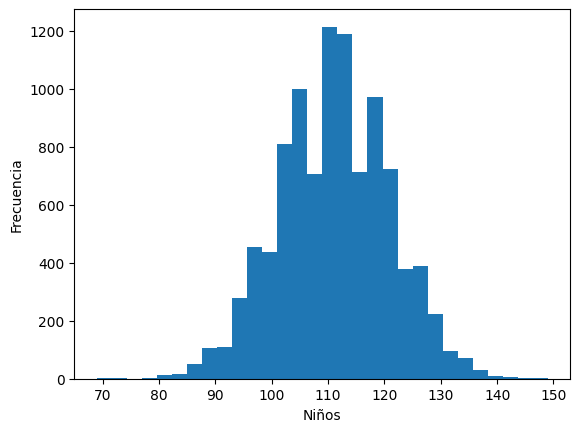

La probabilidad de que nazcan 111 niños es 0.0445


In [18]:
replicas = 10_000
nacimientos = 200

samples = np.random.choice(thetas_posibles, size=replicas, p=posterior)

simulaciones = np.random.binomial(nacimientos, samples)

# posterior predictive
proba_111 = np.sum(simulaciones == 111) / len(samples)

plt.hist(simulaciones, bins= 30)
plt.xlabel('Niños')
plt.ylabel('Frecuencia')
plt.show()

print(f'La probabilidad de que nazcan 111 niños es {proba_111:.4f}')

Que nazcan 111 niños es lo más probable, a pesar de que la chance sea bastante baja (4%).

# 4)
Sea 𝑦 la cantidad de números 6 que salen en 1000 tiradas de un dado equilibrado.


## a)
Obtener la distribución aproximada de 𝑦 usando el teorema central del límite (aproximar por
una normal a partir de la media y varianza poblacional).

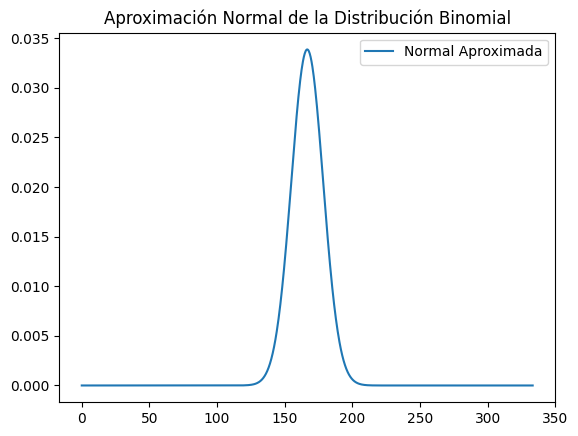

In [55]:
n = 1000
p = 1/6

media = n * p
varianza = n * p * (1 - p)

x = np.linspace(0, 2*media, 1000)
y = stats.norm.pdf(x, loc=media, scale=np.sqrt(varianza))

# Graficar la distribución normal aproximada
plt.plot(x, y, label='Normal Aproximada')
plt.title('Aproximación Normal de la Distribución Binomial')
plt.legend()
plt.show()

In [49]:
percentiles = [5, 25, 50, 75, 95]

valores_percentiles = stats.norm.ppf(np.array(percentiles) / 100, loc=media, scale=np.sqrt(varianza))

for p, val in zip(percentiles, valores_percentiles):
    print(f'Percentil {p}: {val:.2f}')

Percentil 5: 147.28
Percentil 25: 158.72
Percentil 50: 166.67
Percentil 75: 174.62
Percentil 95: 186.05


# 5)
Sea $y$ la cantidad de números 6 que salen en 1000 tiradas de un dado no necesariamente equilibrado, en donde 𝜃 es la probabilidad de sacar 6. Suponer un prior para 𝜃 definido de la siguiente
manera:

𝑃(𝜃 = 1/12) = 0.25  
𝑃(𝜃 = 1/6) = 0.5  
𝑃(𝜃 = 1/4) = 0.25  

## a)
Usando la aproximación normal (de acuerdo al TCL) obtener la distribución prior predictiva
aproximada para $y$